# Quickstart

In [34]:
from lifelines.datasets import load_waltons
df = load_waltons() # returns a Pandas DataFrame

#print(df.head())

In [3]:
T = df['T']
E = df['E']

In [4]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()
kmf.fit(T, event_observed=E) 

<lifelines.KaplanMeierFitter: fitted with 163 observations, 7 censored>

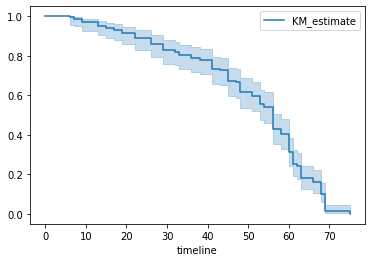

In [7]:
#kmf.survival_function_
#kmf.cumulative_density_
#kmf.median_: questa come si plotta?
kmf.plot_survival_function()

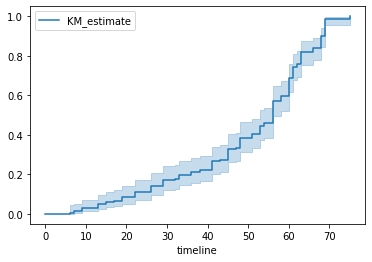

In [6]:
kmf.plot_cumulative_density()

In [10]:
kmf.fit(T, E, timeline=range(0, 100, 2))

kmf.survival_function_   # index is now the same as range(0, 100, 2)
kmf.confidence_interval_ # index is now the same as range(0, 100, 2)

,KM_estimate_upper_0.95,KM_estimate_lower_0.95
0.0,NaN,NaN
2.0,NaN,NaN
4.0,NaN,NaN
6.0,0.999134,0.957254
8.0,0.996917,0.951834
10.0,0.987068,0.927613
12.0,0.987068,0.927613
14.0,0.975031,0.903821
16.0,0.966342,0.888437
18.0,0.961853,0.880865


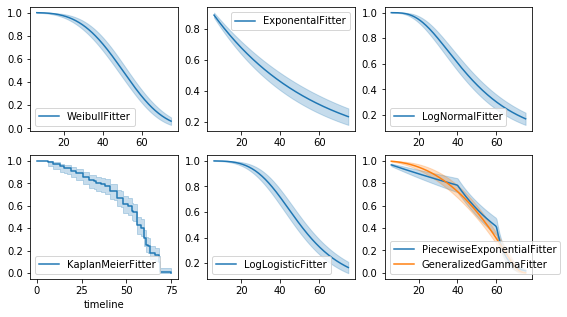

In [14]:
from lifelines import *
from matplotlib import pyplot as plt

fig, axes = plt.subplots(2, 3, figsize=(9, 5))

kmf = KaplanMeierFitter().fit(T, E, label='KaplanMeierFitter')
wbf = WeibullFitter().fit(T, E, label='WeibullFitter')
exf = ExponentialFitter().fit(T, E, label='ExponentalFitter')
lnf = LogNormalFitter().fit(T, E, label='LogNormalFitter')
llf = LogLogisticFitter().fit(T, E, label='LogLogisticFitter')
pwf = PiecewiseExponentialFitter([40, 60]).fit(T, E, label='PiecewiseExponentialFitter')
ggf = GeneralizedGammaFitter().fit(T, E, label='GeneralizedGammaFitter')

wbf.plot_survival_function(ax=axes[0][0])
exf.plot_survival_function(ax=axes[0][1])
lnf.plot_survival_function(ax=axes[0][2])
kmf.plot_survival_function(ax=axes[1][0])
llf.plot_survival_function(ax=axes[1][1])
pwf.plot_survival_function(ax=axes[1][2])
ggf.plot_survival_function(ax=axes[1][2])

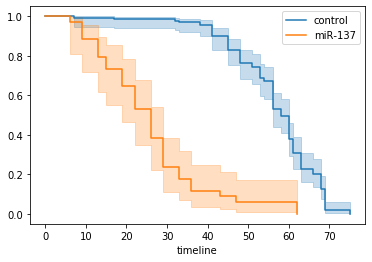

In [15]:
groups = df['group']
ix = (groups == 'miR-137')

kmf.fit(T[~ix], E[~ix], label='control')
ax = kmf.plot()

kmf.fit(T[ix], E[ix], label='miR-137')
ax = kmf.plot(ax=ax)


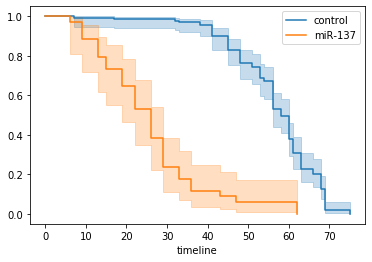

In [20]:
ax = plt.subplot(111)

kmf = KaplanMeierFitter()

for name, grouped_df in df.groupby('group'):
    kmf.fit(grouped_df["T"], grouped_df["E"], label=name)
    kmf.plot(ax=ax)

In [21]:
from lifelines import NelsonAalenFitter
naf = NelsonAalenFitter()
naf.fit(T, event_observed=E)

<lifelines.NelsonAalenFitter: fitted with 163 observations, 7 censored>

In [25]:
from lifelines.utils import survival_table_from_events

table = survival_table_from_events(T, E)
print(table.head())

          removed  observed  censored  entrance  at_risk
event_at                                                
0.0             0         0         0       163      163
6.0             1         1         0         0      163
7.0             2         1         1         0      162
9.0             3         3         0         0      160
13.0            3         3         0         0      157


In [26]:
from lifelines.datasets import load_regression_dataset
regression_dataset = load_regression_dataset()

regression_dataset.head()

,var1,var2,var3,T,E
0,0.595170,1.143472,1.571079,14.785652,1
1,0.209325,0.184677,0.356980,7.335846,1
2,0.693919,0.071893,0.557960,5.269797,1
3,0.443804,1.364646,0.374221,11.684092,1
4,1.613324,0.125566,1.921325,7.639492,1


In [27]:
from lifelines import CoxPHFitter

# Using Cox Proportional Hazards model
cph = CoxPHFitter()
cph.fit(regression_dataset, 'T', event_col='E')
cph.print_summary()


<lifelines.CoxPHFitter: fitted with 200 observations, 11 censored>
      duration col = 'T'
         event col = 'E'
number of subjects = 200
  number of events = 189
partial log-likelihood = -807.62
  time fit was run = 2019-09-13 13:00:04 UTC

---
      coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
var1  0.22      1.25      0.07            0.08            0.37                1.08                1.44
var2  0.05      1.05      0.08           -0.11            0.21                0.89                1.24
var3  0.22      1.24      0.08            0.07            0.37                1.07                1.44

        z      p  -log2(p)
var1 2.99 <0.005      8.49
var2 0.61   0.54      0.89
var3 2.88 <0.005      7.97
---
Concordance = 0.58
Log-likelihood ratio test = 15.54 on 3 df, -log2(p)=9.47


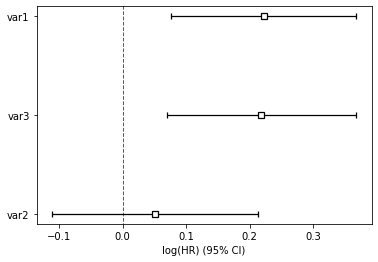

In [28]:
cph.plot()

In [29]:
from lifelines import WeibullAFTFitter

wft = WeibullAFTFitter()
wft.fit(regression_dataset, 'T', event_col='E')
wft.print_summary()

<lifelines.WeibullAFTFitter: fitted with 200 observations, 11 censored>
         event col = 'E'
number of subjects = 200
  number of events = 189
    log-likelihood = -504.48
  time fit was run = 2019-09-13 13:00:26 UTC

---
                    coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
lambda_ var1       -0.08      0.92      0.02           -0.13           -0.04                0.88                0.97
        var2       -0.02      0.98      0.03           -0.07            0.04                0.93                1.04
        var3       -0.08      0.92      0.02           -0.13           -0.03                0.88                0.97
        _intercept  2.53     12.57      0.05            2.43            2.63               11.41               13.85
rho_    _intercept  1.09      2.98      0.05            0.99            1.20                2.68                3.32

                       z      p  -log2(p)
lambda_ var1       -3.45 <0.0

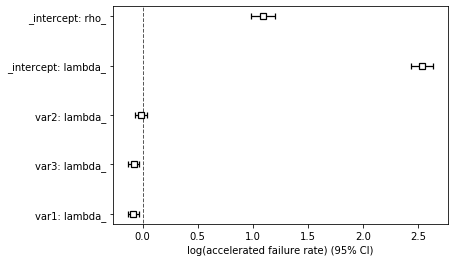

In [30]:
wft.plot()

In [31]:
from lifelines import AalenAdditiveFitter
aaf = AalenAdditiveFitter(fit_intercept=False)
aaf.fit(regression_dataset, 'T', event_col='E')

<lifelines.AalenAdditiveFitter: fitted with 200 observations, 11 censored>

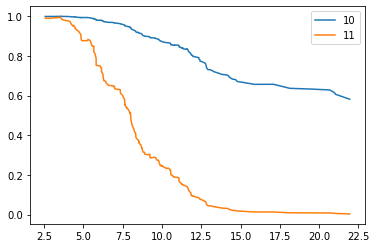

In [32]:
X = regression_dataset.drop(['E', 'T'], axis=1)
aaf.predict_survival_function(X.iloc[10:12]).plot() 

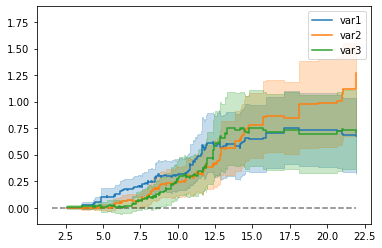

In [33]:
aaf.plot()

# Introduction to Survival Analysis

Observed lifetimes at time 10:
 [10.          4.45227051  3.26760312  4.69591174  1.67325166 10.
 10.          0.09878128  1.46376194  5.51558738  5.6458956   0.80079973
  3.90091866  8.91626183 10.          3.39130683  3.13667638  6.10520598
  0.52942413  1.34118276 10.          2.14958823  6.10140734  1.21784432
  1.75915325]


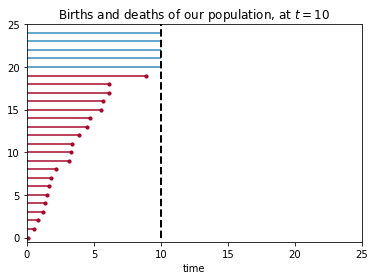

In [35]:
from lifelines.plotting import plot_lifetimes
import numpy as np
from numpy.random import uniform, exponential

N = 25

CURRENT_TIME = 10

actual_lifetimes = np.array([
    exponential(12) if (uniform() < 0.5) else exponential(2) for i in range(N)
])
observed_lifetimes = np.minimum(actual_lifetimes, CURRENT_TIME)
death_observed = actual_lifetimes < CURRENT_TIME

ax = plot_lifetimes(observed_lifetimes, event_observed=death_observed)

ax.set_xlim(0, 25)
ax.vlines(10, 0, 30, lw=2, linestyles='--')
ax.set_xlabel("time")
ax.set_title("Births and deaths of our population, at $t=10$")
print("Observed lifetimes at time %d:\n" % (CURRENT_TIME), observed_lifetimes)

(0, 25)

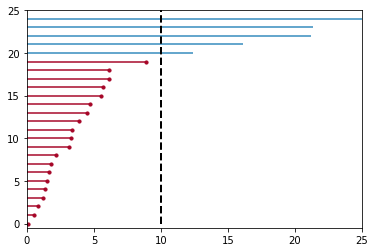

In [36]:
ax = plot_lifetimes(actual_lifetimes, event_observed=death_observed)
ax.vlines(10, 0, 30, lw=2, linestyles='--')
ax.set_xlim(0, 25)

# Estimating univariate models

In [37]:
from lifelines.datasets import load_dd

data = load_dd()
data.head()

,ctryname,cowcode2,politycode,un_region_name,un_continent_name,ehead,leaderspellreg,democracy,regime,start_year,duration,observed
0,Afghanistan,700,700.0,Southern Asia,Asia,Mohammad Zahir Shah,Mohammad Zahir Shah.Afghanistan.1946.1952.Mona...,Non-democracy,Monarchy,1946,7,1
1,Afghanistan,700,700.0,Southern Asia,Asia,Sardar Mohammad Daoud,Sardar Mohammad Daoud.Afghanistan.1953.1962.Ci...,Non-democracy,Civilian Dict,1953,10,1
2,Afghanistan,700,700.0,Southern Asia,Asia,Mohammad Zahir Shah,Mohammad Zahir Shah.Afghanistan.1963.1972.Mona...,Non-democracy,Monarchy,1963,10,1
3,Afghanistan,700,700.0,Southern Asia,Asia,Sardar Mohammad Daoud,Sardar Mohammad Daoud.Afghanistan.1973.1977.Ci...,Non-democracy,Civilian Dict,1973,5,0
4,Afghanistan,700,700.0,Southern Asia,Asia,Nur Mohammad Taraki,Nur Mohammad Taraki.Afghanistan.1978.1978.Civi...,Non-democracy,Civilian Dict,1978,1,0


In [38]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()

In [39]:
T = data["duration"]
E = data["observed"]

kmf.fit(T, event_observed=E)

<lifelines.KaplanMeierFitter: fitted with 1808 observations, 340 censored>

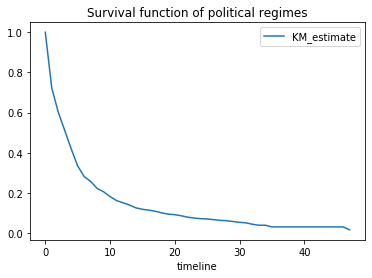

In [40]:
kmf.survival_function_.plot()
plt.title('Survival function of political regimes');

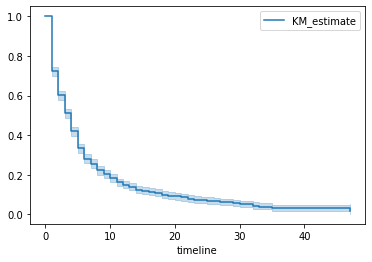

In [41]:
kmf.plot()

In [42]:
kmf.median_

4.0

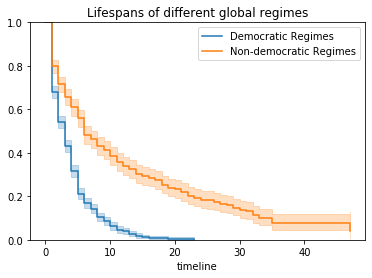

In [43]:
ax = plt.subplot(111)

dem = (data["democracy"] == "Democracy")

kmf.fit(T[dem], event_observed=E[dem], label="Democratic Regimes")
kmf.plot(ax=ax)
kmf.fit(T[~dem], event_observed=E[~dem], label="Non-democratic Regimes")
kmf.plot(ax=ax)

plt.ylim(0, 1);
plt.title("Lifespans of different global regimes");

Median survival time of democratic: 3.0
Median survival time of non-democratic: 6.0


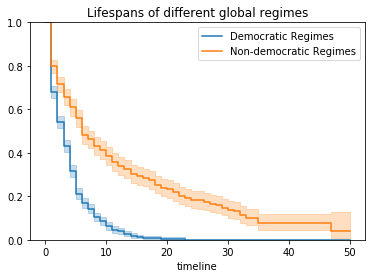

In [44]:
ax = plt.subplot(111)

t = np.linspace(0, 50, 51)
kmf.fit(T[dem], event_observed=E[dem], timeline=t, label="Democratic Regimes")
ax = kmf.plot(ax=ax)
print("Median survival time of democratic:", kmf.median_)

kmf.fit(T[~dem], event_observed=E[~dem], timeline=t, label="Non-democratic Regimes")
ax = kmf.plot(ax=ax)
print("Median survival time of non-democratic:", kmf.median_)

plt.ylim(0, 1)
plt.title("Lifespans of different global regimes");


In [45]:
from lifelines.statistics import logrank_test

results = logrank_test(T[dem], T[~dem], E[dem], E[~dem], alpha=.99)

results.print_summary()

<lifelines.StatisticalResult>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.99

---
test_statistic      p  -log2(p)
        260.47 <0.005    192.23


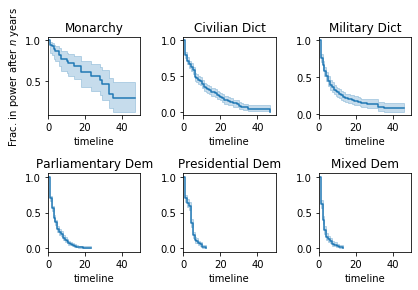

In [46]:
regime_types = data['regime'].unique()

for i, regime_type in enumerate(regime_types):
    ax = plt.subplot(2, 3, i + 1)

    ix = data['regime'] == regime_type
    kmf.fit(T[ix], E[ix], label=regime_type)
    kmf.plot(ax=ax, legend=False)

    plt.title(regime_type)
    plt.xlim(0, 50)

    if i==0:
        plt.ylabel('Frac. in power after $n$ years')

plt.tight_layout()

In [47]:
T = data["duration"]
E = data["observed"]

from lifelines import NelsonAalenFitter
naf = NelsonAalenFitter()

naf.fit(T,event_observed=E)

<lifelines.NelsonAalenFitter: fitted with 1808 observations, 340 censored>

          NA_estimate
timeline             
0.0          0.000000
1.0          0.325912
2.0          0.507356
3.0          0.671251
4.0          0.869867


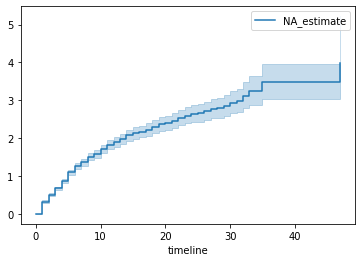

In [48]:
print(naf.cumulative_hazard_.head())
naf.plot()

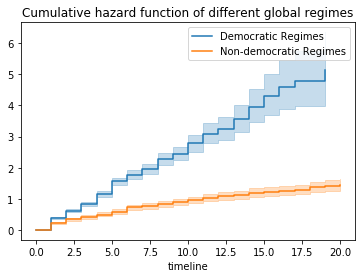

In [49]:
naf.fit(T[dem], event_observed=E[dem], label="Democratic Regimes")
ax = naf.plot(loc=slice(0, 20))

naf.fit(T[~dem], event_observed=E[~dem], label="Non-democratic Regimes")
naf.plot(ax=ax, loc=slice(0, 20))

plt.title("Cumulative hazard function of different global regimes");


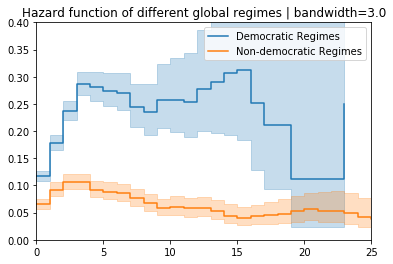

In [50]:
bandwidth = 3.

naf.fit(T[dem], event_observed=E[dem], label="Democratic Regimes")
ax = naf.plot_hazard(bandwidth=bandwidth)

naf.fit(T[~dem], event_observed=E[~dem], label="Non-democratic Regimes")
naf.plot_hazard(ax=ax, bandwidth=bandwidth)

plt.title("Hazard function of different global regimes | bandwidth=%.1f" % bandwidth);
plt.ylim(0, 0.4)
plt.xlim(0, 25);

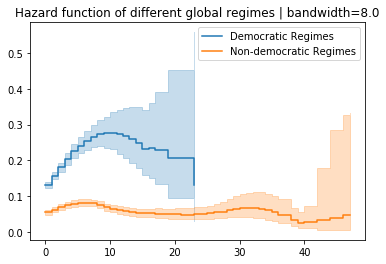

In [51]:
bandwidth = 8.0

naf.fit(T[dem], event_observed=E[dem], label="Democratic Regimes")
ax = naf.plot_hazard(bandwidth=bandwidth)

naf.fit(T[~dem], event_observed=E[~dem], label="Non-democratic Regimes")
naf.plot_hazard(ax=ax, bandwidth=bandwidth)

plt.title("Hazard function of different global regimes | bandwidth=%.1f" % bandwidth);

<lifelines.WeibullFitter: fitted with 163 observations, 7 censored>
number of subjects = 163
  number of events = 156
    log-likelihood = -672.06
        hypothesis = lambda_ != 1, rho_ != 1

---
         coef  se(coef)  lower 0.95  upper 0.95      p  -log2(p)
lambda_ 55.73      1.33       53.13       58.33 <0.005       inf
rho_     3.45      0.24        2.97        3.93 <0.005     76.83


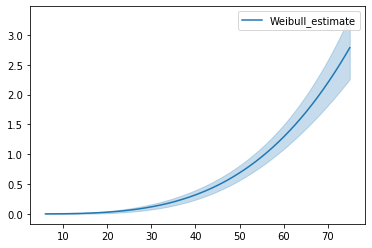

In [52]:
from lifelines import WeibullFitter
from lifelines.datasets import load_waltons

data = load_waltons()

T = data['T']
E = data['E']

wf = WeibullFitter().fit(T, E)

wf.print_summary()
wf.plot()


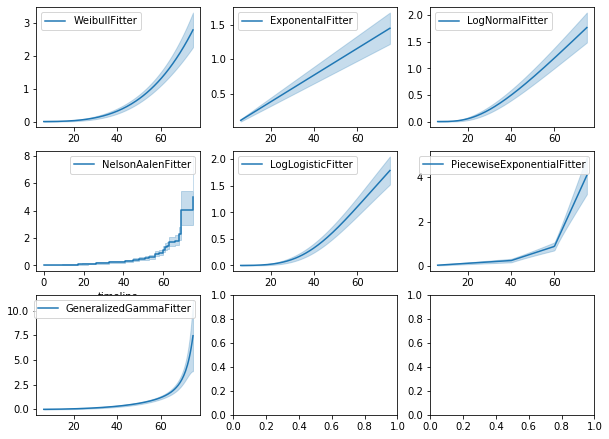

In [53]:
from lifelines import (WeibullFitter, ExponentialFitter,
LogNormalFitter, LogLogisticFitter, NelsonAalenFitter,
PiecewiseExponentialFitter, GeneralizedGammaFitter)

from lifelines.datasets import load_waltons
data = load_waltons()

fig, axes = plt.subplots(3, 3, figsize=(10, 7.5))

T = data['T']
E = data['E']

wbf = WeibullFitter().fit(T, E, label='WeibullFitter')
exf = ExponentialFitter().fit(T, E, label='ExponentalFitter')
lnf = LogNormalFitter().fit(T, E, label='LogNormalFitter')
naf = NelsonAalenFitter().fit(T, E, label='NelsonAalenFitter')
llf = LogLogisticFitter().fit(T, E, label='LogLogisticFitter')
pwf = PiecewiseExponentialFitter([40, 60]).fit(T, E, label='PiecewiseExponentialFitter')
gg = GeneralizedGammaFitter().fit(T, E, label='GeneralizedGammaFitter')

wbf.plot_cumulative_hazard(ax=axes[0][0])
exf.plot_cumulative_hazard(ax=axes[0][1])
lnf.plot_cumulative_hazard(ax=axes[0][2])
naf.plot_cumulative_hazard(ax=axes[1][0])
llf.plot_cumulative_hazard(ax=axes[1][1])
pwf.plot_cumulative_hazard(ax=axes[1][2])
gg.plot_cumulative_hazard(ax=axes[2][0])

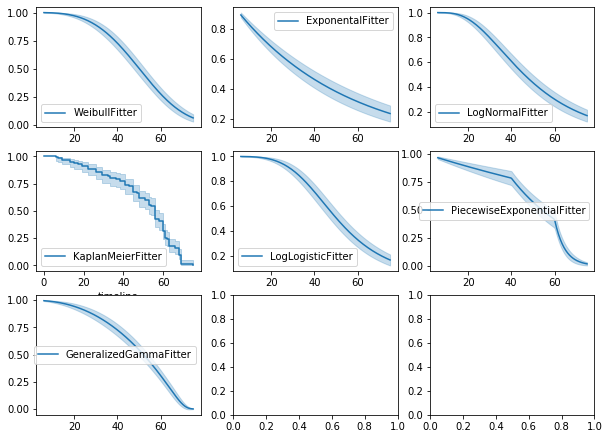

In [54]:
from lifelines import KaplanMeierFitter

fig, axes = plt.subplots(3, 3, figsize=(10, 7.5))

T = data['T']
E = data['E']

kmf = KaplanMeierFitter().fit(T, E, label='KaplanMeierFitter')
wbf = WeibullFitter().fit(T, E, label='WeibullFitter')
exf = ExponentialFitter().fit(T, E, label='ExponentalFitter')
lnf = LogNormalFitter().fit(T, E, label='LogNormalFitter')
llf = LogLogisticFitter().fit(T, E, label='LogLogisticFitter')
pwf = PiecewiseExponentialFitter([40, 60]).fit(T, E, label='PiecewiseExponentialFitter')
gg = GeneralizedGammaFitter().fit(T, E, label='GeneralizedGammaFitter')

wbf.plot_survival_function(ax=axes[0][0])
exf.plot_survival_function(ax=axes[0][1])
lnf.plot_survival_function(ax=axes[0][2])
kmf.plot_survival_function(ax=axes[1][0])
llf.plot_survival_function(ax=axes[1][1])
pwf.plot_survival_function(ax=axes[1][2])
gg.plot_survival_function(ax=axes[2][0])

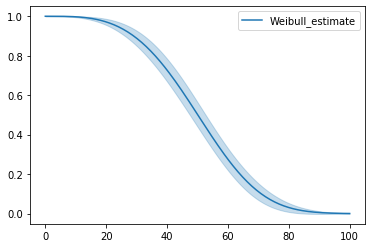

In [55]:
timeline = np.linspace(0, 100, 200)

# directly compute the survival function, these return a pandas Series
wbf = WeibullFitter().fit(T, E)
wbf.survival_function_at_times(timeline)
wbf.hazard_at_times(timeline)
wbf.cumulative_hazard_at_times(timeline)

# use the `timeline` kwarg in `fit`
# by default, all functions and properties will use
# these values provided
wbf = WeibullFitter().fit(T, E, timeline=timeline)


wbf.plot_survival_function()

In [56]:
from lifelines.datasets import load_nh4
df = load_nh4()[['NH4.Orig.mg.per.L', 'NH4.mg.per.L', 'Censored']]
print(df.head())

  NH4.Orig.mg.per.L  NH4.mg.per.L  Censored
1            <0.006         0.006      True
2            <0.006         0.006      True
3             0.006         0.006     False
4             0.016         0.016     False
5            <0.006         0.006      True


In [57]:
T, E = df['NH4.mg.per.L'], ~df['Censored']

kmf = KaplanMeierFitter()
kmf.fit_left_censoring(T, E)

<lifelines.KaplanMeierFitter: fitted with 102 observations, 46 censored>

          KM_estimate
timeline             
0.000        0.379897
0.006        0.401002
0.007        0.464319
0.008        0.478828
0.009        0.536868


Text(0.5, 0, 'Concentration of NH_4')

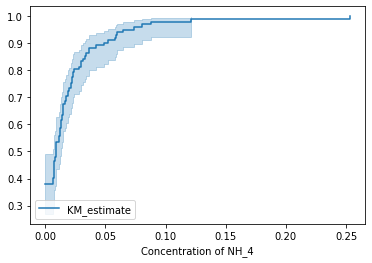

In [58]:
print(kmf.cumulative_density_.head())

kmf.plot() #will plot the CDF
plt.xlabel("Concentration of NH_4")

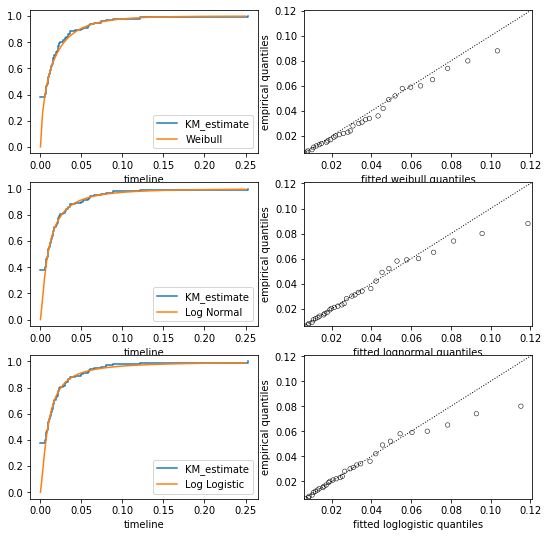

In [59]:
from lifelines import *
from lifelines.plotting import qq_plot

fig, axes = plt.subplots(3, 2, figsize=(9, 9))
timeline = np.linspace(0, 0.25, 100)

wf = WeibullFitter().fit_left_censoring(T, E, label="Weibull", timeline=timeline)
lnf = LogNormalFitter().fit_left_censoring(T, E, label="Log Normal", timeline=timeline)
lgf = LogLogisticFitter().fit_left_censoring(T, E, label="Log Logistic", timeline=timeline)

# plot what we just fit, along with the KMF estimate
kmf.plot_cumulative_density(ax=axes[0][0], ci_show=False)
wf.plot_cumulative_density(ax=axes[0][0], ci_show=False)
qq_plot(wf, ax=axes[0][1])

kmf.plot_cumulative_density(ax=axes[1][0], ci_show=False)
lnf.plot_cumulative_density(ax=axes[1][0], ci_show=False)
qq_plot(lnf, ax=axes[1][1])

kmf.plot_cumulative_density(ax=axes[2][0], ci_show=False)
lgf.plot_cumulative_density(ax=axes[2][0], ci_show=False)
qq_plot(lgf, ax=axes[2][1])
